# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'lpnumb0631'
os.environ['KAGGLE_KEY'] = '8faca4b1d8b23b0954ec0e1922118609'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!rm *.*
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip '*.zip'

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.



  0%|          | 0.00/476k [00:00<?, ?B/s]
100%|##########| 476k/476k [00:00<00:00, 21.8MB/s]
'unzip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [9]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [10]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거


df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
df.dropna(inplace=True)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


### 문제 5. 수치형 데이터의 히스토그램 확인하기


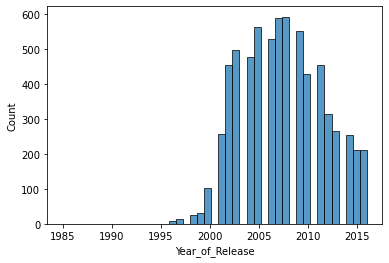

In [12]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인



sns.histplot(x=df['Year_of_Release'])


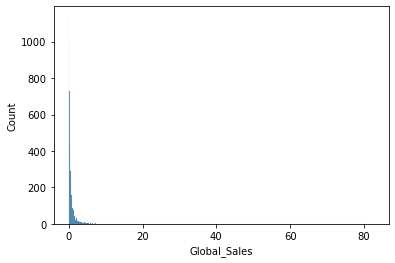

In [13]:
sns.histplot(x=df['Global_Sales'])


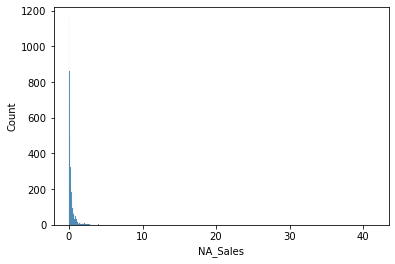

In [14]:
sns.histplot(x=df['NA_Sales'])


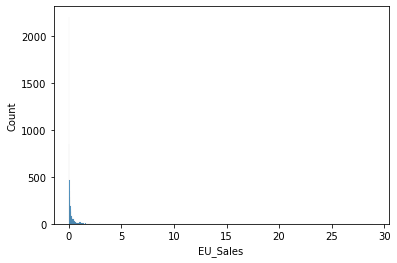

In [15]:
sns.histplot(x=df['EU_Sales'])


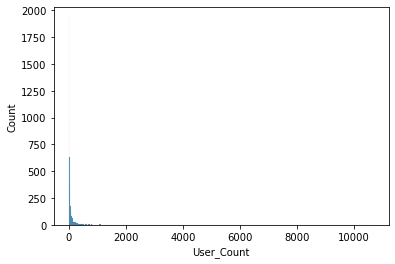

In [16]:
sns.histplot(x=df['User_Count'])


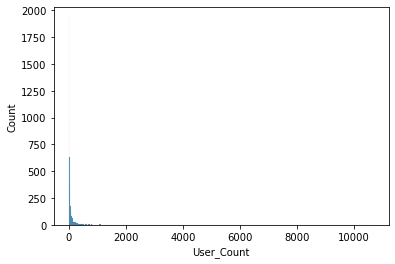

In [17]:
sns.histplot(x=df['User_Count'])


### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

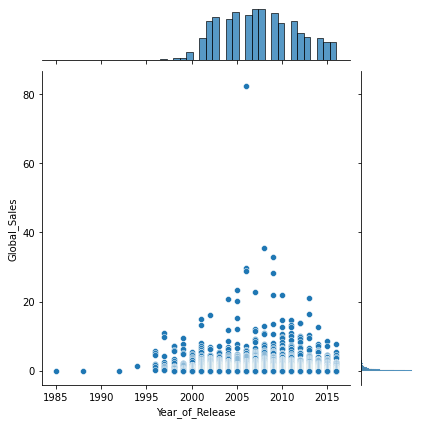

In [21]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석





sns.jointplot(x=df['Year_of_Release'], y=df['Global_Sales'])

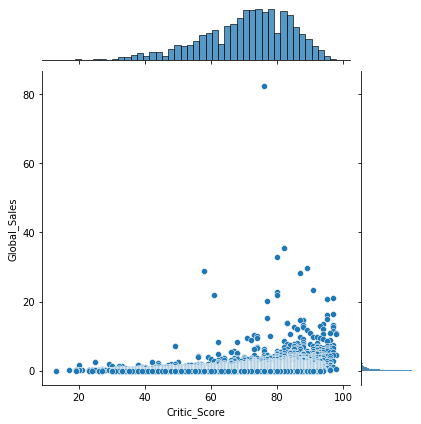

In [22]:
sns.jointplot(x=df['Critic_Score'], y=df['Global_Sales'])

(array([   0., 1000., 2000.]), <a list of 0 Text major ticklabel objects>)

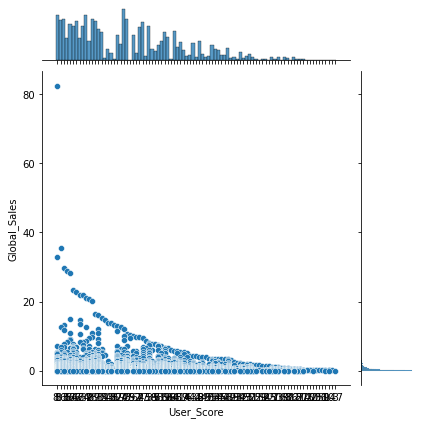

In [28]:
sns.jointplot(x=df['User_Score'], y=df['Global_Sales'])
plt.xticks(rotation = -45)

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

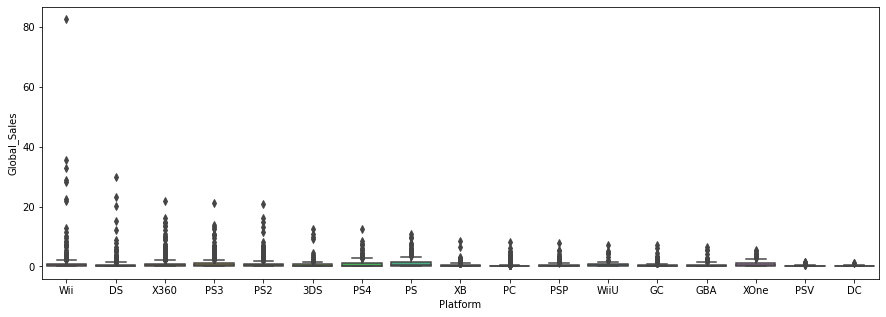

In [31]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석

fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Platform', y='Global_Sales', data=df)

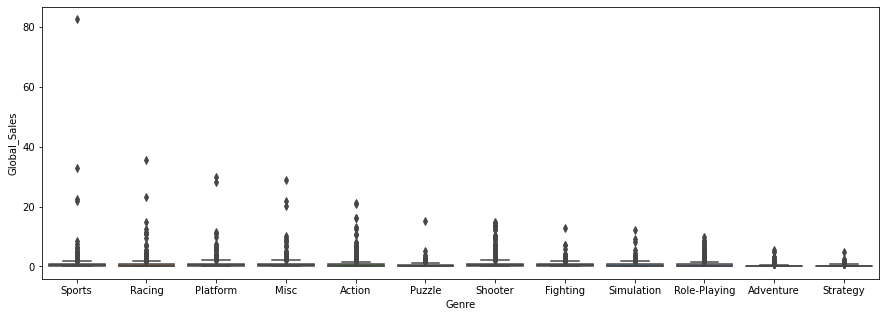

In [33]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Genre', y='Global_Sales', data=df)

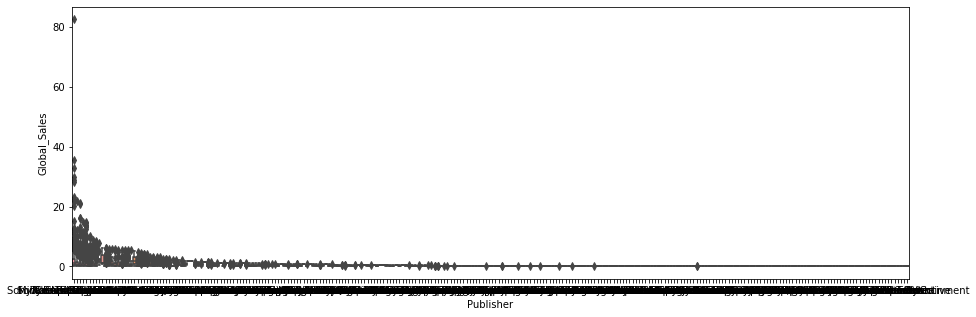

In [34]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)

### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

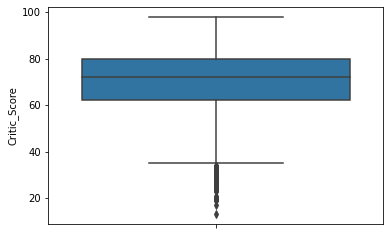

In [35]:
sns.boxplot(y='Critic_Score', data=df)

In [38]:
sns.boxplot(x='User_Score', data=df)

TypeError: Horizontal orientation requires numeric `x` variable.

### 문제 9. 수치형 데이터간의 상관성 시각화하기

In [ ]:
# Correlation Heatmap 시각화하기






## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

In [ ]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인







### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [ ]:
X_cat = 





## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

scaler = 
X = 
y = 




In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 





### 문제 13. XGBoost 모델 생성/학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 14. Linear Regression 모델 생성/학습하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression 모델 생성/학습
model_lr




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = 
pred_lr = 






### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [ ]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

scaler = 
X = 
y = 




In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 





### 문제 19. XGBoost 모델 생성/학습하기

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 20. Linear Regression 모델 생성/학습하기

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = 




### 문제 21. 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = 
pred_lr = 





### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 23. XGBoost 모델의 Feature Importance 시각화하기